## Option Pricing Techniques 

As with other option pricing techniques Explicit Finite Difference methods are used to price options using what is essentially a three step process.

**Step 1:** Generate the grid by specifying grid points.<br>
**Step 2:** Specify the final or initial conditions.<br>
**Step 3:** Use boundary conditions to calculate option values and step back down the grid to fill it.

**European Option**

To price an option, we generate a finite grid of a specified asset and time steps for a given maturity. Next, we specify the initial and boundary conditions to calculate payoff when S and T equals zero. We then step back to fill the grid with newer values derived from the earlier values.

**Import Required Libraries**

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set max row and columns to 300 and 100
pd.set_option('display.max_rows', 300)
pd.set_option('display.max_columns', 100)

**Specify Parameters**

In [2]:
# Specify the parameters for FDM 
T    = 1                              # time to maturity in years
E    = 100                            # strike price
r    = .05                            # riskfree rate
vol  = .20                            # volatility
call = True                           # call = True

NAS  = 20                             # number of asset steps 
ds   = 2*E/NAS                        # asset step size

dt   = (0.9/vol**2/NAS**2)            # time step size, for stability - refer lecture
NTS  = int(T/dt) + 1                  # number of time steps
dt   = T/NTS                          # time step size [Expiration as int # of time steps away]

american = False                      # american = False

### Generate Grid

Build the grid with the above input parameters

In [3]:
# Create asset steps i*ds
s = np.arange(0, (NAS+1)*ds, ds)
s

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120., 130., 140., 150., 160., 170., 180., 190., 200.])

In [4]:
# Create time steps k*dt
# k goes from 0,1,...,10; # t goes from 1,0.9,...0
t= T-np.arange(NTS*dt,-dt,-dt)[::-1]
t

array([1.        , 0.94444444, 0.88888889, 0.83333333, 0.77777778,
       0.72222222, 0.66666667, 0.61111111, 0.55555556, 0.5       ,
       0.44444444, 0.38888889, 0.33333333, 0.27777778, 0.22222222,
       0.16666667, 0.11111111, 0.05555556, 0.        ])

In [5]:
# Verify the steps size
s.shape, t.shape

((21,), (19,))

In [6]:
# Initialize the grid with zeros
grid = np.zeros((len(s), len(t)))

# Subsume the grid points into a dataframe
# with asset price as index and time steps as columns
grid = pd.DataFrame(grid, index=s, columns=np.around(t, 3))
grid

,1.000,0.944,0.889,0.833,0.778,0.722,0.667,0.611,0.556,0.500,0.444,0.389,0.333,0.278,0.222,0.167,0.111,0.056,0.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Set up Payoff

Specify payoffs at expiration for calls
$$V_i^{0} = max(i\delta s - E, 0)$$

In [7]:
# Set Payoff at Expiration
flag = 1 if call else -1
grid.iloc[:,-1] = np.maximum(flag * (s - E), 0)

In [8]:
# Verify the grid
grid

,1.000,0.944,0.889,0.833,0.778,0.722,0.667,0.611,0.556,0.500,0.444,0.389,0.333,0.278,0.222,0.167,0.111,0.056,0.000
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# Store payoff for early exercise
p = grid.iloc[:, -1].copy()
p

0.0        0.0
10.0       0.0
20.0       0.0
30.0       0.0
40.0       0.0
50.0       0.0
60.0       0.0
70.0       0.0
80.0       0.0
90.0       0.0
100.0      0.0
110.0     10.0
120.0     20.0
130.0     30.0
140.0     40.0
150.0     50.0
160.0     60.0
170.0     70.0
180.0     80.0
190.0     90.0
200.0    100.0
Name: 0.0, dtype: float64

### Fill the Grid

Specify boundary condition at S = $0$
$$V_0^{k} = (1 - r \delta t) V_0^{k-1}$$

Specify boundary condition at S = $\infty$
$$V_i^{k} = 2V_{i-1}^{k} - V_{i-2}^{k}$$

In [10]:
# Fill the grid
for k in range(len(t)-2, -1, -1):  # Backward in time
    for i in range(1, len(s)-1):
        delta = (grid.iloc[i+1, k+1] - grid.iloc[i-1, k+1]) / (2*ds)
        gamma = (grid.iloc[i+1, k+1] - 2*grid.iloc[i, k+1] + grid.iloc[i-1, k+1]) / (ds**2)
        theta = (-0.5 * vol**2 * s[i]**2 * gamma) - (r*s[i]*delta) + (r*grid.iloc[i, k+1])
        
        grid.iloc[i, k] = grid.iloc[i, k+1] - dt*theta
    
    # Set boundary condition at S = 0
    grid.iloc[0, k] = grid.iloc[0, k+1] * np.exp(-r*dt)
    
    # Set boundary condition at S = infinity
    grid.iloc[-1, k] = 2*grid.iloc[-2, k] - grid.iloc[-3, k]
    
    # Check for early exercise
    if american:
        discount_factor = np.exp(-r * (T - t[k]))
        grid.iloc[:, k] = np.maximum(grid.iloc[:, k], p*discount_factor)

# round grid values to 2 decimals
grid = np.around(grid,2)

In [11]:
# Output the option values
grid

,1.000,0.944,0.889,0.833,0.778,0.722,0.667,0.611,0.556,0.500,0.444,0.389,0.333,0.278,0.222,0.167,0.111,0.056,0.000
0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
10.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
20.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
30.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
40.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
50.0,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
60.0,0.07,0.05,0.04,0.03,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
70.0,0.43,0.37,0.31,0.26,0.21,0.16,0.13,0.09,0.07,0.04,0.03,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.0
80.0,1.75,1.58,1.42,1.25,1.10,0.94,0.80,0.66,0.53,0.42,0.31,0.22,0.14,0.08,0.04,0.01,0.00,0.00,0.0
90.0,4.90,4.60,4.31,4.00,3.70,3.39,3.08,2.77,2.45,2.13,1.81,1.49,1.18,0.88,0.59,0.34,0.13,0.00,0.0


In [12]:
# Print out stock, payoff and option value 
data = {
    "Stock": s,
    "Payoff": p,
    "Option": grid.iloc[:,0]
}

option_value_2D = pd.DataFrame(data)
# print(option_value_2D.to_string(index=False))
option_value_2D                         

,Stock,Payoff,Option
0.0,0.0,0.0,0.00
10.0,10.0,0.0,0.00
20.0,20.0,0.0,0.00
30.0,30.0,0.0,0.00
40.0,40.0,0.0,0.00
50.0,50.0,0.0,0.01
60.0,60.0,0.0,0.07
70.0,70.0,0.0,0.43
80.0,80.0,0.0,1.75
90.0,90.0,0.0,4.90


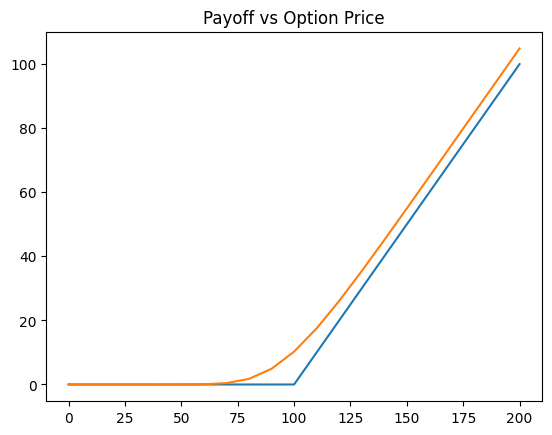

In [13]:
# Plot option value and payoff
plt.plot(option_value_2D[['Payoff', 'Option']])
plt.title("Payoff vs Option Price")
plt.show()

## User Defined Function
Let's subsume above grid calculation into a function for ease of use. All we have to do is to combine the above code blocks into a single function.

In [ ]:
# Call the function to price options
fdm_grid = efdmoption()
fdm_grid

## Option Values
Let's now get the value of European & American call and put option for K=100, Volatility=20%, Rate=5%, T=1 and NAS=60.

## Visualize the payoff

In [ ]:
# option prices grid
option_grid = efdmoption(100,0.2,0.05,1,50,call=True, american=False)
# Create meshgrid for plotting
X, Y = np.meshgrid(option_grid.index, option_grid.columns)
# Create 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X, Y, option_grid.values.T, cmap='viridis', edgecolor='none')

# Title and labels
ax.set_title('Option Pricing by Explicit FDM')
ax.set_xlabel('Spot Price')
ax.set_ylabel('Time to Maturity')
ax.set_zlabel('Option Value')

# Invert Z-axis to flip the surface
ax.invert_xaxis()

# Add color bar to indicate the value scale
fig.colorbar(surf)

# Show the plot
plt.show()

## Bilinear Interpolation

We have generated the grid and filled it with the possible option values. However, if we have to estimate option value or its derivatives on the mesh points, how can we estimate the value at points in between? The simplest way is to do a two-dimensional interpolation method called **Bilinear Interpolation**.

The option value can be estimated using the values from the nearest neighbouring values. Assume $V_1, V_2, V_3 \space and \space V_4$ are the option values from the nearest neighbour and $A_1, A_2, A_3 \space and \space A_4$ are the areas of the rectanges made by the four corners and the interior points, we can approximate the option value at the interior points as 

$$
\frac{\sum^4_{i=1} A_iV_i}{\sum^4_{i=1} A_i}
$$

In [ ]:
def bilinear_interpolation(asset_price, ttm, df):

    # Find relevant rows and columns
    col1 = df.columns[df.columns > ttm][-1]
    col2 = df.columns[df.columns <= ttm][0]
    row1 = df.index[df.index < asset_price,][-1]
    row2 = df.index[df.index >= asset_price,][0]
   
    # Define points and areas
    V = [df.loc[row1, col1], df.loc[row1, col2],
           df.loc[row2, col2], df.loc[row2, col1]]
                      
    A = [(row2 - asset_price) * (col2 - ttm),
           (row2 - asset_price) * (ttm - col1),
           (asset_price - row1) * (ttm - col1),
           (asset_price - row1) * (col2 - ttm)]
   
    # Interpolate values
    return np.sum(np.array(V)*np.array(A))/sum(np.array(A))

In [ ]:
# Option value, approximated
bilinear_interpolation(115,0.3,fdm_grid)

## Convergence Analysis
Let's now compare option pricing for various asset steps (NAS) with black scholes price.

In [ ]:
# Iterate over asset steps (NAS)
nas_list = [10,20,30,40,50,60]
fdmoption = []
for i in nas_list:
    fdmoption.append(efdmoption(100,0.2,0.05,1,i).loc[100,1])
fdmoption

In [ ]:
# Call black scholes class
from quantmod.models import OptionInputs, BlackScholesOptionPricing

# Instantiate black scholes object
bsoption = BlackScholesOptionPricing(
        OptionInputs(
            spot = 100,
            strike = 100, 
            rate = 0.05,
            ttm = 1,
            volatility = 0.20,
            )
        ).call_price

bsoption = bsoption.repeat(len(nas_list))

# Range of option price
bsoption

In [ ]:
# Subsume into dataframe
df = pd.DataFrame(list(zip(bsoption,fdmoption)), columns=['BS', 'FDM'], index=nas_list)
df['dev'] = df['FDM'] - df['BS']
df['% dev'] = round(df['dev'] / df['BS'] * 100.,2)

# Output
print("BS - FDM Convergence over NAS")
df